# 2D LiDAR Mapping and Floor Detection with Aurora SDK

This notebook demonstrates Aurora's built-in 2D LiDAR capabilities, including real-time scan visualization, 2D grid mapping, and automatic floor detection system.

## What is 2D LiDAR Mapping?

Aurora includes a powerful 2D LiDAR system that provides:

### 📡 **Real-time LiDAR Scanning**
- High-resolution 2D distance measurements
- 360-degree environmental awareness
- Real-time obstacle detection and mapping

### 🗺️ **2D Grid Map Generation**
- Real-time occupancy grid mapping from LiDAR scans
- Configurable map resolution and parameters
- Preview map generation for navigation planning

### 🏢 **Automatic Floor Detection**
- Multi-floor environment awareness
- Histogram-based floor level analysis
- Automatic floor transition detection

## Applications

- **Autonomous Navigation**: Real-time obstacle avoidance and path planning
- **SLAM Systems**: 2D simultaneous localization and mapping
- **Safety Systems**: Perimeter monitoring and collision avoidance
- **Multi-floor Robotics**: Elevator-based navigation and floor awareness
- **Industrial Automation**: Warehouse navigation and material handling

Let's explore these capabilities with three practical examples!

## Setup and Imports

In [1]:
# Core imports
from slamtec_aurora_sdk import AuroraSDK
from slamtec_aurora_sdk.exceptions import DataNotReadyError, AuroraSDKError
from slamtec_aurora_sdk.data_types import GridMapGenerationOptions, Rect
import numpy as np
import time
import math
from collections import deque

# Visualization
try:
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from matplotlib.colors import ListedColormap
    from matplotlib.patches import Circle
    MATPLOTLIB_AVAILABLE = True
    print("✅ Matplotlib available for visualization")
    
    # Configure matplotlib for notebook
    try:
        # This will work in Jupyter notebooks
        get_ipython().run_line_magic('matplotlib', 'inline')
    except:
        # Fallback for regular Python execution
        pass
    plt.rcParams['figure.figsize'] = (12, 8)
except ImportError:
    MATPLOTLIB_AVAILABLE = False
    print("⚠️ Matplotlib not available. Install with: pip install matplotlib")

# Optional: OpenCV for advanced image processing
try:
    import cv2
    OPENCV_AVAILABLE = True
    print("✅ OpenCV available for image processing")
except ImportError:
    OPENCV_AVAILABLE = False
    print("⚠️ OpenCV not available (optional for advanced processing)")

print("\n🚀 2D LiDAR mapping notebook ready!")
print(f"Required libraries: {'✅' if MATPLOTLIB_AVAILABLE else '❌'} Matplotlib")
print(f"Optional libraries: {'✅' if OPENCV_AVAILABLE else '❌'} OpenCV")

✅ Matplotlib available for visualization
✅ OpenCV available for image processing

🚀 2D LiDAR mapping notebook ready!
Required libraries: ✅ Matplotlib
Optional libraries: ✅ OpenCV


## Step 1: Connect to Device and Enable LiDAR

Let's connect to Aurora and verify 2D LiDAR functionality.

In [2]:
# Step 2: Connect to Aurora device
# Device connection and setup
device_ip = "192.168.11.1"  # Replace with your device IP

print("Connecting to Aurora device...")

# Create Aurora SDK instance
sdk = AuroraSDK()
print("Aurora SDK instance created")

# Check version info
try:
    version_info = sdk.get_version_info()
    print(f"Aurora SDK Version: {version_info['version_string']}")
except Exception as e:
    print(f"Warning: Could not get SDK version: {e}")

# Session is created automatically
print("SDK session created automatically...")

# Connect to device
try:
    sdk.connect(connection_string=device_ip)
    print(f"✅ Connected to Aurora device at {device_ip}!")
except Exception as e:
    print(f"❌ Connection failed: {e}")
    raise

Connecting to Aurora device...
Aurora SDK instance created
Aurora SDK Version: 2.0.0-beta1
SDK session created automatically...
✅ Connected to Aurora device at 192.168.11.1!


In [3]:
# Step 3: Initialize 2D LiDAR mapping and floor detection
print("\n🔧 Setting up 2D LiDAR mapping system...")

# Configure 2D map generation options (following working example pattern)
map_options = GridMapGenerationOptions()
map_options.resolution = 0.05  # 5cm resolution  
map_options.map_canvas_width = 150.0  # 150m x 150m canvas (like working example)
map_options.map_canvas_height = 150.0
map_options.active_map_only = 1  # Generate active map only
map_options.height_range_specified = 0  # Don't specify height range, use auto detection
map_options.min_height = 0.0
map_options.max_height = 0.0

print(f"Map options configured: {map_options.map_canvas_width}m x {map_options.map_canvas_height}m at {map_options.resolution}m resolution")

# STEP 1: Start 2D map generation first (following working example order)
print("Starting 2D map generation...")
try:
    sdk.lidar_2d_map_builder.start_preview_map_background_update(map_options)
    print("✅ 2D map generation started")
except Exception as e:
    print(f"❌ Failed to start 2D map generation: {e}")
    raise

# STEP 2: Enable auto floor detection (following working example)
print("Enabling auto floor detection...")
try:
    sdk.lidar_2d_map_builder.set_preview_map_auto_floor_detection(True)
    print("✅ Auto floor detection enabled")
except Exception as e:
    print(f"❌ Failed to enable auto floor detection: {e}")
    raise

# STEP 3: CRITICAL - Enable map data syncing AFTER starting 2D operations
# (This order is crucial - enabling before causes issues, but after works!)
print("Enabling map data syncing (delayed approach)...")
try:
    time.sleep(1)  # Brief pause for 2D operations to stabilize
    sdk.enable_map_data_syncing(True)
    print("✅ Map data syncing enabled")
except Exception as e:
    print(f"⚠️ Could not enable map data syncing: {e}")

print("\n🎯 2D LiDAR mapping system is now active!")
print("   - Map generation: Started")
print("   - Floor detection: Enabled") 
print("   - Map data syncing: Enabled")
print("   - Canvas size: 150m x 150m")
print("   - Resolution: 5cm per cell")


🔧 Setting up 2D LiDAR mapping system...
Map options configured: 150.0m x 150.0m at 0.05000000074505806m resolution
Starting 2D map generation...
✅ 2D map generation started
Enabling auto floor detection...
✅ Auto floor detection enabled
Enabling map data syncing (delayed approach)...
✅ Map data syncing enabled

🎯 2D LiDAR mapping system is now active!
   - Map generation: Started
   - Floor detection: Enabled
   - Map data syncing: Enabled
   - Canvas size: 150m x 150m
   - Resolution: 5cm per cell


📡 Capturing current LiDAR scan...
✅ LiDAR scan captured:
   Total points: 1091
   Valid points: 1091
   Cartesian points: 1091
   Distance range: 0.33m - 4.42m
   Average distance: 2.26m
   Quality range: 10 - 254


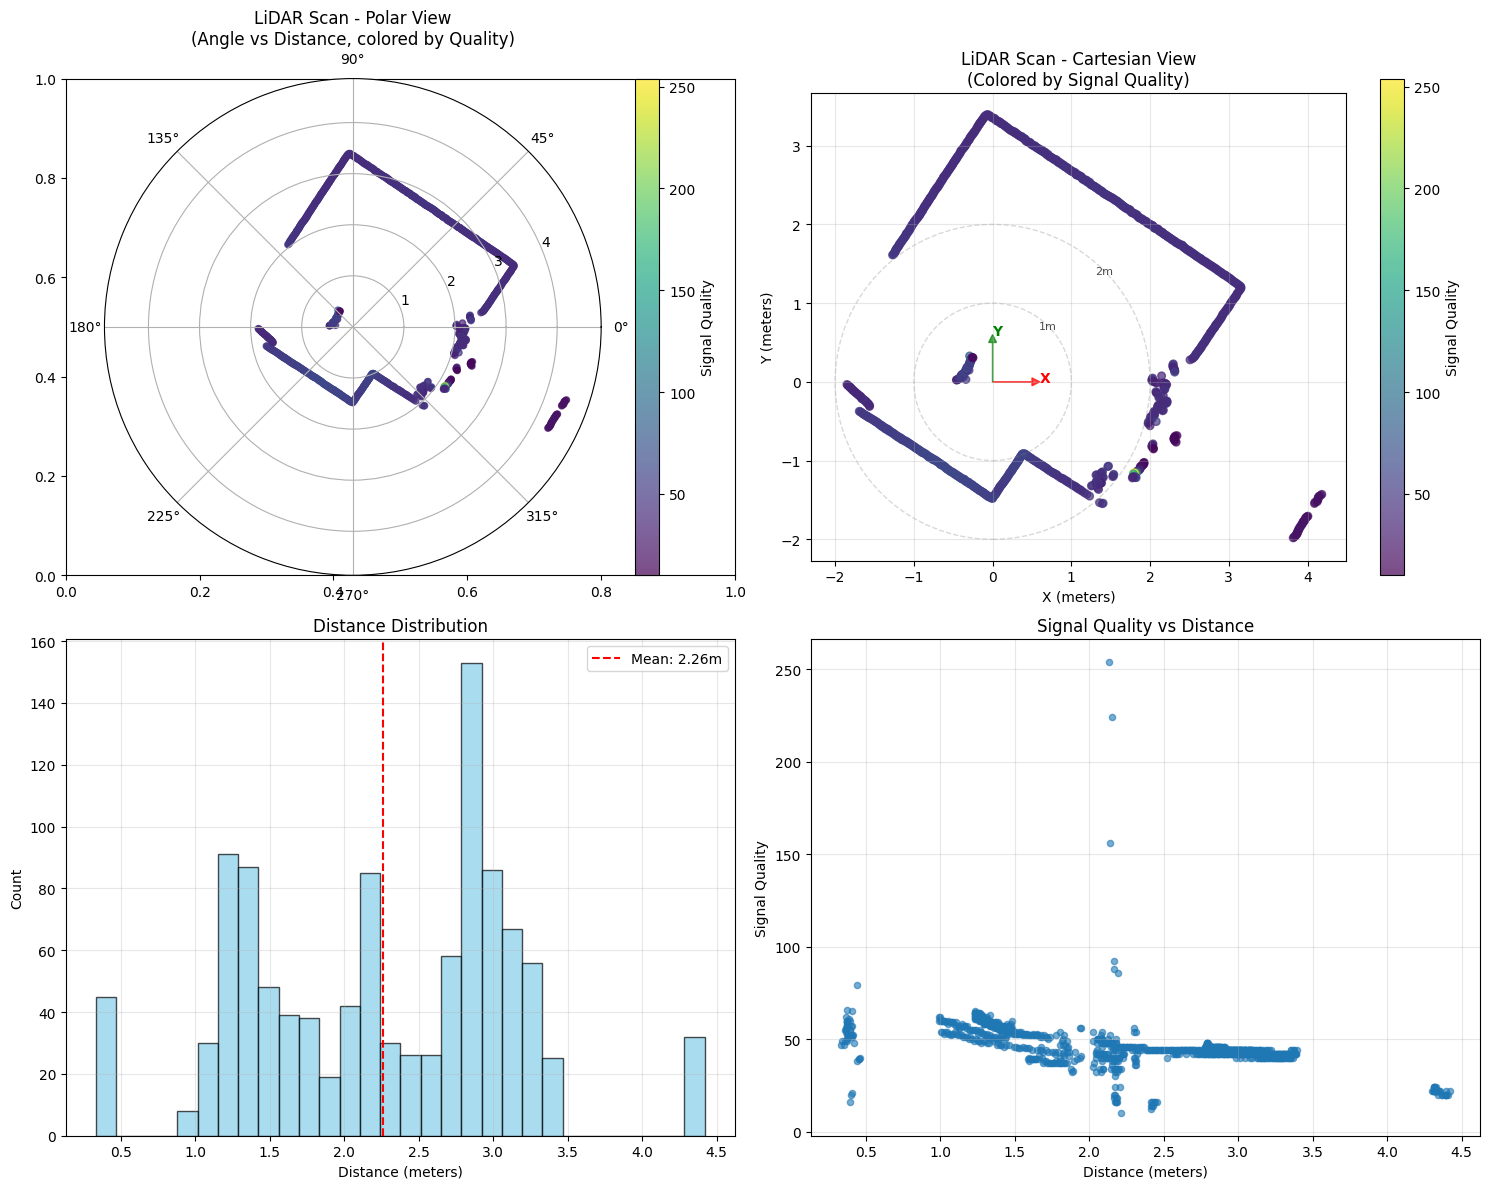

In [22]:
if not (sdk.is_connected()):
    print("❌ Device not connected")
else:
    try:
        print("📡 Capturing current LiDAR scan...")
        
        # Get recent LiDAR scan
        scan_data = sdk.get_recent_lidar_scan(max_points=8192)
        
        if scan_data is None:
            print("⚠️ No LiDAR scan data available")
        else:
            # Get scan statistics
            total_points = scan_data.get_scan_count()
            valid_points = scan_data.get_valid_points()
            cartesian_points = scan_data.to_cartesian()
            
            print(f"✅ LiDAR scan captured:")
            print(f"   Total points: {total_points}")
            print(f"   Valid points: {len(valid_points)}")
            print(f"   Cartesian points: {len(cartesian_points)}")
            
            if valid_points and len(valid_points) > 0:
                # Extract data for analysis
                distances = [p[0] for p in valid_points]  # distance in meters
                angles = [p[1] for p in valid_points]     # angle in radians
                qualities = [p[2] for p in valid_points]  # signal quality
                
                # Convert to cartesian coordinates
                x_coords = [p[0] for p in cartesian_points]
                y_coords = [p[1] for p in cartesian_points]
                
                print(f"   Distance range: {min(distances):.2f}m - {max(distances):.2f}m")
                print(f"   Average distance: {np.mean(distances):.2f}m")
                print(f"   Quality range: {min(qualities)} - {max(qualities)}")
                
                # Visualization
                if MATPLOTLIB_AVAILABLE:
                    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
                    
                    # 1. Polar plot (traditional LiDAR view)
                    ax1 = plt.subplot(2, 2, 1, projection='polar')
                    scatter1 = ax1.scatter(angles, distances, c=qualities, cmap='viridis', s=20, alpha=0.7)
                    ax1.set_title('LiDAR Scan - Polar View\n(Angle vs Distance, colored by Quality)')
                    ax1.set_ylim(0, max(distances) * 1.1)
                    plt.colorbar(scatter1, ax=ax1, label='Signal Quality')
                    
                    # 2. Cartesian plot with quality coloring
                    scatter2 = ax2.scatter(x_coords, y_coords, c=qualities, cmap='viridis', s=30, alpha=0.7)
                    ax2.set_title('LiDAR Scan - Cartesian View\n(Colored by Signal Quality)')
                    ax2.set_xlabel('X (meters)')
                    ax2.set_ylabel('Y (meters)')
                    ax2.grid(True, alpha=0.3)
                    ax2.set_aspect('equal')
                    
                    # Add distance rings for reference
                    max_range = max(distances)
                    for radius in [1, 2, 5, 10]:
                        if radius <= max_range:
                            circle = Circle((0, 0), radius, fill=False, color='gray', alpha=0.3, linestyle='--')
                            ax2.add_patch(circle)
                            ax2.text(radius * 0.707, radius * 0.707, f'{radius}m', 
                                   fontsize=8, alpha=0.7, ha='center', va='center')
                    
                    # Add coordinate system arrows
                    ax2.arrow(0, 0, 0.5, 0, head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
                    ax2.arrow(0, 0, 0, 0.5, head_width=0.1, head_length=0.1, fc='green', ec='green', alpha=0.7)
                    ax2.text(0.6, 0, 'X', fontsize=10, color='red', fontweight='bold')
                    ax2.text(0, 0.6, 'Y', fontsize=10, color='green', fontweight='bold')
                    
                    plt.colorbar(scatter2, ax=ax2, label='Signal Quality')
                    
                    # 3. Distance histogram
                    ax3.hist(distances, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                    ax3.axvline(np.mean(distances), color='red', linestyle='--', 
                               label=f'Mean: {np.mean(distances):.2f}m')
                    ax3.set_xlabel('Distance (meters)')
                    ax3.set_ylabel('Count')
                    ax3.set_title('Distance Distribution')
                    ax3.legend()
                    ax3.grid(True, alpha=0.3)
                    
                    # 4. Quality vs Distance plot
                    ax4.scatter(distances, qualities, alpha=0.6, s=20)
                    ax4.set_xlabel('Distance (meters)')
                    ax4.set_ylabel('Signal Quality')
                    ax4.set_title('Signal Quality vs Distance')
                    ax4.grid(True, alpha=0.3)
                    
                    plt.tight_layout()
                    plt.show()
                
                # Store scan for later use
                current_scan_data = scan_data
                
            else:
                print("⚠️ No valid points in LiDAR scan")
        
    except Exception as e:
        print(f"❌ LiDAR scan error: {e}")
        import traceback
        traceback.print_exc()

## Example 2: Generate and Visualize 2D Grid Map

Let's create a 2D occupancy grid map from LiDAR data for navigation planning.

📊 Example 2: Current 2D Grid Map Preview
Requesting preview map redraw...
Getting dirty rectangle info...
Map changed: False
Dirty rect: x=-20.00, y=-11.10, w=26.14, h=20.48
Getting preview map...
✅ Preview map retrieved successfully
Map dimensions: x=[-20.00, 6.50], y=[-11.10, 18.75]
Fetch rectangle: x=-20.00, y=-11.10, w=26.50, h=29.85
Reading cell data...
Cell data info: 530 x 597 cells
Real coordinates: (-20.00, -11.10)
Cell data length: 316410


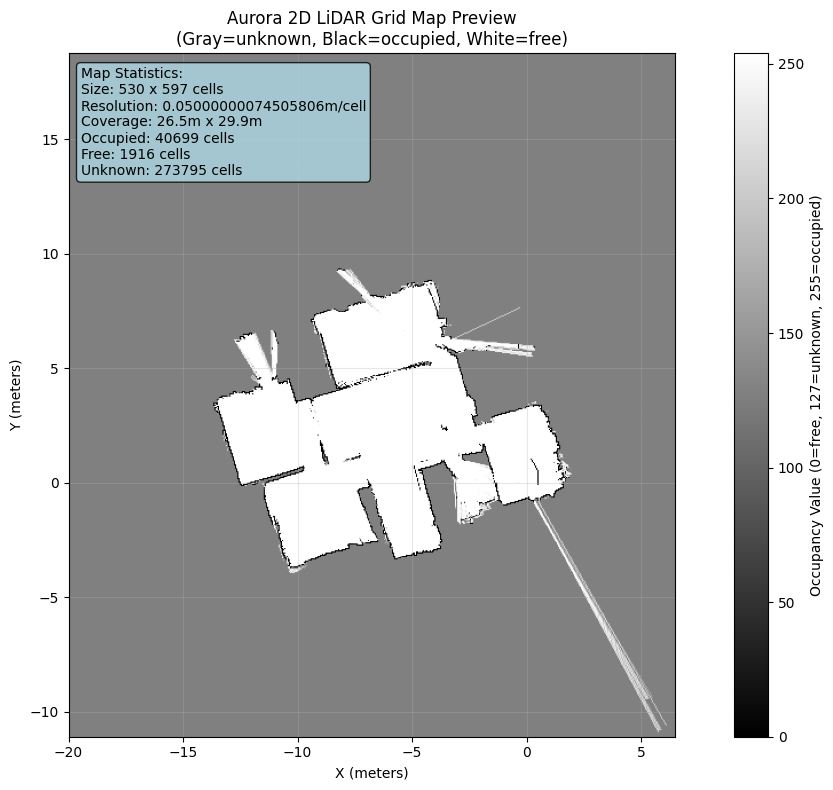

✅ 2D grid map displayed successfully!
   - Map size: 530 x 597 cells
   - Physical size: 26.5m x 29.9m
   - Occupied cells: 40699
   - Free cells: 1916
   - Unknown cells: 273795


In [32]:
# Example 2: Retrieve and plot current 2D grid map preview
print("📊 Example 2: Current 2D Grid Map Preview")
print("="*50)

try:
    # Request map redraw and get map data directly
    print("Requesting preview map redraw...")
    sdk.lidar_2d_map_builder.require_preview_map_redraw()
    
    # Get dirty rectangle info
    print("Getting dirty rectangle info...")
    dirty_rect, map_changed = sdk.lidar_2d_map_builder.get_and_reset_preview_map_dirty_rect()
    print(f"Map changed: {map_changed}")
    print(f"Dirty rect: x={dirty_rect.x:.2f}, y={dirty_rect.y:.2f}, w={dirty_rect.width:.2f}, h={dirty_rect.height:.2f}")
    
    # Get preview map
    print("Getting preview map...")
    preview_map = sdk.lidar_2d_map_builder.get_preview_map()
    
    if not preview_map:
        print("❌ No preview map available")
    else:
        print("✅ Preview map retrieved successfully")
        
        # Get map dimension
        dimension = preview_map.get_map_dimension()
        print(f"Map dimensions: x=[{dimension.min_x:.2f}, {dimension.max_x:.2f}], y=[{dimension.min_y:.2f}, {dimension.max_y:.2f}]")
        
        # Create fetch rectangle for FULL map extent
        fetch_rect = Rect()
        fetch_rect.x = dimension.min_x
        fetch_rect.y = dimension.min_y
        fetch_rect.width = dimension.max_x - dimension.min_x
        fetch_rect.height = dimension.max_y - dimension.min_y
        
        print(f"Fetch rectangle: x={fetch_rect.x:.2f}, y={fetch_rect.y:.2f}, w={fetch_rect.width:.2f}, h={fetch_rect.height:.2f}")
        
        # Skip if fetch rectangle is invalid
        if fetch_rect.width <= 0 or fetch_rect.height <= 0:
            print("❌ Invalid fetch rectangle")
        else:
            # Read cell data for the entire map
            print("Reading cell data...")
            cell_data, fetch_info = preview_map.read_cell_data(fetch_rect)
            
            print(f"Cell data info: {fetch_info.cell_width} x {fetch_info.cell_height} cells")
            print(f"Real coordinates: ({fetch_info.real_x:.2f}, {fetch_info.real_y:.2f})")
            print(f"Cell data length: {len(cell_data)}")
            
            if len(cell_data) > 0 and fetch_info.cell_width > 0 and fetch_info.cell_height > 0:
                # Convert to numpy array for visualization
                import numpy as np
                map_array = np.array(cell_data, dtype=np.uint8)
                expected_size = fetch_info.cell_height * fetch_info.cell_width
                
                if len(map_array) == expected_size:
                    map_array = map_array.reshape(fetch_info.cell_height, fetch_info.cell_width)
                    
                    # Create the plot
                    plt.figure(figsize=(12, 8))
                    
                    # Calculate proper extent for the map
                    extent = [dimension.min_x, dimension.max_x, dimension.min_y, dimension.max_y]
                    
                    # Display the map
                    plt.imshow(map_array, cmap='gray', origin='lower', extent=extent)
                    plt.colorbar(label='Occupancy Value (0=free, 127=unknown, 255=occupied)')
                    plt.title('Aurora 2D LiDAR Grid Map Preview\n(Gray=unknown, Black=occupied, White=free)')
                    plt.xlabel('X (meters)')
                    plt.ylabel('Y (meters)')
                    plt.grid(True, alpha=0.3)
                    
                    # Add statistics
                    occupied_cells = np.sum(map_array > 200)  # Occupied threshold
                    free_cells = np.sum(map_array < 50)      # Free threshold
                    unknown_cells = len(map_array.flatten()) - occupied_cells - free_cells
                    
                    stats_text = f"Map Statistics:\n" \
                                f"Size: {fetch_info.cell_width} x {fetch_info.cell_height} cells\n" \
                                f"Resolution: {map_options.resolution}m/cell\n" \
                                f"Coverage: {dimension.max_x - dimension.min_x:.1f}m x {dimension.max_y - dimension.min_y:.1f}m\n" \
                                f"Occupied: {occupied_cells} cells\n" \
                                f"Free: {free_cells} cells\n" \
                                f"Unknown: {unknown_cells} cells"
                    
                    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
                            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
                    
                    plt.tight_layout()
                    plt.show()
                    
                    print(f"✅ 2D grid map displayed successfully!")
                    print(f"   - Map size: {fetch_info.cell_width} x {fetch_info.cell_height} cells")
                    print(f"   - Physical size: {dimension.max_x - dimension.min_x:.1f}m x {dimension.max_y - dimension.min_y:.1f}m")
                    print(f"   - Occupied cells: {occupied_cells}")
                    print(f"   - Free cells: {free_cells}")
                    print(f"   - Unknown cells: {unknown_cells}")
                else:
                    print(f"❌ Map data size mismatch: expected {expected_size}, got {len(map_array)}")
            else:
                print("❌ No valid map cell data available")
        
except Exception as e:
    print(f"❌ Error retrieving 2D grid map: {e}")
    import traceback
    traceback.print_exc()

🏢 Analyzing floor detection system...

📊 Retrieving floor detection histogram...
✅ Floor detection histogram retrieved
   Histogram bins: 9
   Bin width: 0.5m
   Start height: -0.25m
   Total bins: 9
   Detected peaks (potential floors): 2
     Peak 1: 0.25m (intensity: 173.50)
     Peak 2: 3.25m (intensity: 73.50)

🔍 Retrieving floor detection info...
✅ Floor detection info retrieved
   Number of detected floors: 2
   Current floor ID: 7
   Floor 0: ID=1, Height=0.60m, Confidence=-0.25
   Floor 1: ID=1071644672, Height=0.67m, Confidence=0.00

📍 Getting current floor description...
✅ Current floor description retrieved
   Current floor ID: 7
   Current floor height: 3.33m
   Confidence: 1.75


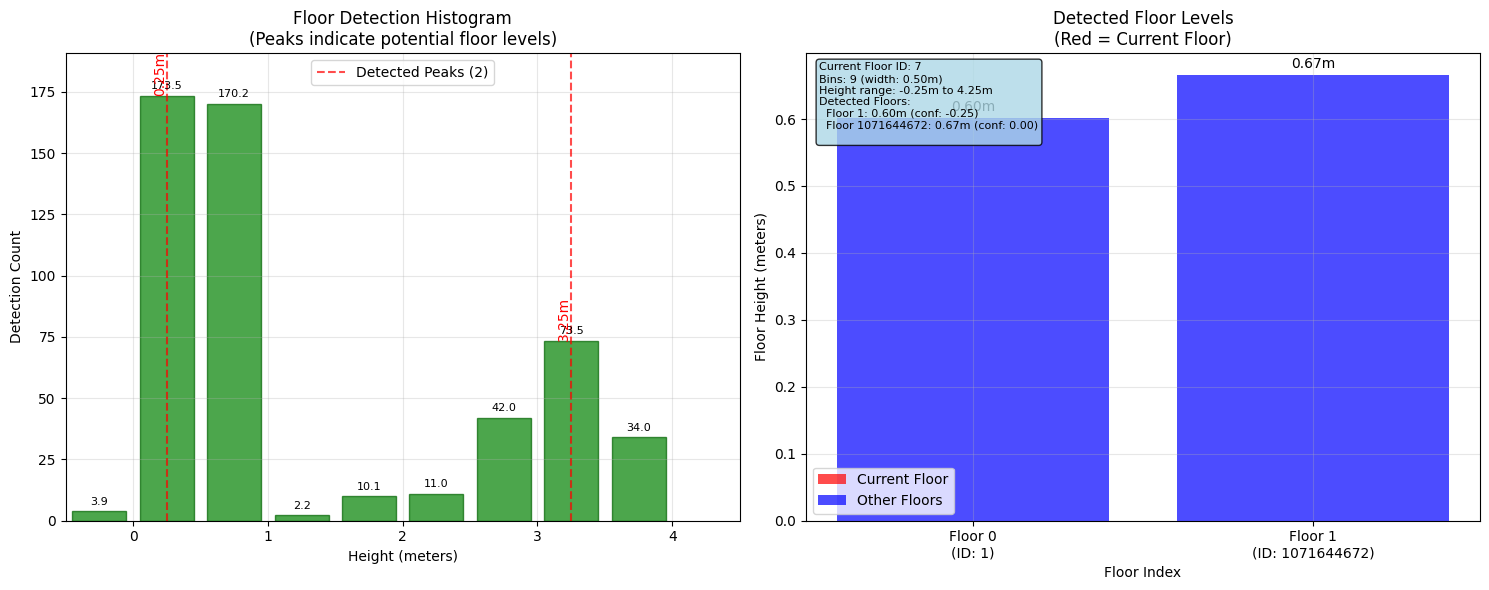

Histogram visualization completed: 9 bins, max value: 173.5


In [26]:
if not (sdk.is_connected() and hasattr(sdk, 'floor_detector')):
    print("❌ Floor detector not available")
else:
    try:
        print("🏢 Analyzing floor detection system...")
        
        # Get floor detection histogram (following working example)
        print("\n📊 Retrieving floor detection histogram...")
        try:
            histogram_info, histogram_data = sdk.floor_detector.get_detection_histogram()
            
            if histogram_info and histogram_data and len(histogram_data) > 0 and histogram_info.bin_total_count > 0:
                print(f"✅ Floor detection histogram retrieved")
                print(f"   Histogram bins: {len(histogram_data)}")
                print(f"   Bin width: {histogram_info.bin_width}m")
                print(f"   Start height: {histogram_info.bin_height_start}m")
                print(f"   Total bins: {histogram_info.bin_total_count}")
                
                # Calculate bin centers for plotting (following working example)
                bin_centers = []
                for i in range(len(histogram_data)):
                    height = histogram_info.bin_height_start + (i * histogram_info.bin_width)
                    bin_centers.append(height)
                
                # Find peaks in histogram (potential floors)
                histogram_array = np.array(histogram_data)
                peak_threshold = np.max(histogram_array) * 0.1  # 10% of max value
                peaks = []
                
                for i in range(1, len(histogram_array) - 1):
                    if (histogram_array[i] > histogram_array[i-1] and 
                        histogram_array[i] > histogram_array[i+1] and 
                        histogram_array[i] > peak_threshold):
                        peaks.append((bin_centers[i], histogram_array[i]))
                
                print(f"   Detected peaks (potential floors): {len(peaks)}")
                for i, (height, intensity) in enumerate(peaks):
                    print(f"     Peak {i+1}: {height:.2f}m (intensity: {intensity:.2f})")
                
                # Store histogram for visualization
                current_histogram = {
                    'info': histogram_info,
                    'data': histogram_data,
                    'bin_centers': bin_centers,
                    'peaks': peaks
                }
                
            else:
                print("⚠️ No histogram data available (empty or zero bins)")
                current_histogram = None
                
        except Exception as e:
            print(f"⚠️ Histogram retrieval error: {e}")
            current_histogram = None
        
        # Get floor detection info (following working example)
        print("\n🔍 Retrieving floor detection info...")
        try:
            floor_descriptions, current_floor_id = sdk.floor_detector.get_all_detection_info()
            
            if floor_descriptions and len(floor_descriptions) > 0:
                print(f"✅ Floor detection info retrieved")
                print(f"   Number of detected floors: {len(floor_descriptions)}")
                print(f"   Current floor ID: {current_floor_id}")
                
                for i, floor_desc in enumerate(floor_descriptions):
                    # Use correct attribute names: floorID, typical_height, confidence
                    print(f"   Floor {i}: ID={floor_desc.floorID}, Height={floor_desc.typical_height:.2f}m, Confidence={floor_desc.confidence:.2f}")
                
                # Store floor info
                current_floor_info = {
                    'descriptions': floor_descriptions,
                    'current_floor_id': current_floor_id
                }
                
            else:
                print("⚠️ No floor detection info available")
                current_floor_info = None
                
        except Exception as e:
            print(f"⚠️ Floor info retrieval error: {e}")
            current_floor_info = None
        
        # Get current floor description
        print("\n📍 Getting current floor description...")
        try:
            current_floor_desc = sdk.floor_detector.get_current_detection_desc()
            
            if current_floor_desc:
                print(f"✅ Current floor description retrieved")
                # Use correct attribute names: floorID, typical_height, confidence
                print(f"   Current floor ID: {current_floor_desc.floorID}")
                print(f"   Current floor height: {current_floor_desc.typical_height:.2f}m")
                print(f"   Confidence: {current_floor_desc.confidence:.2f}")
            else:
                print("⚠️ Current floor description not available")
                
        except Exception as e:
            print(f"⚠️ Current floor description error: {e}")
        
        # Visualization (following working example pattern)
        if MATPLOTLIB_AVAILABLE and current_histogram:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # 1. Floor detection histogram (following working example)
            bars = ax1.bar(current_histogram['bin_centers'], current_histogram['data'], 
                          width=current_histogram['info'].bin_width * 0.8, 
                          color='green', alpha=0.7, edgecolor='darkgreen')
            
            ax1.set_xlabel('Height (meters)')
            ax1.set_ylabel('Detection Count')
            ax1.set_title('Floor Detection Histogram\n(Peaks indicate potential floor levels)')
            ax1.grid(True, alpha=0.3)
            
            # Add value labels on bars (following working example)
            for bar, value in zip(bars, current_histogram['data']):
                if value > 0:
                    height = bar.get_height()
                    ax1.text(bar.get_x() + bar.get_width()/2., height + max(current_histogram['data']) * 0.01,
                           f'{value:.1f}', ha='center', va='bottom', fontsize=8)
            
            # Set axis limits (following working example)
            ax1.set_xlim(current_histogram['info'].bin_height_start - current_histogram['info'].bin_width/2,
                        current_histogram['info'].bin_height_start + len(current_histogram['data']) * current_histogram['info'].bin_width + current_histogram['info'].bin_width/2)
            ax1.set_ylim(0, max(current_histogram['data']) * 1.1)
            
            # Mark detected peaks
            for height, intensity in current_histogram['peaks']:
                ax1.axvline(height, color='red', linestyle='--', alpha=0.7)
                ax1.text(height, intensity, f'{height:.2f}m', 
                        rotation=90, ha='right', va='bottom', color='red')
            
            # Add legend for peaks
            if current_histogram['peaks']:
                ax1.plot([], [], 'r--', alpha=0.7, label=f'Detected Peaks ({len(current_histogram["peaks"])})')
                ax1.legend()
            
            # 2. Floor level visualization with info text (following working example)
            if current_floor_info and current_floor_info['descriptions']:
                floor_ids = [desc.floorID for desc in current_floor_info['descriptions']]
                floor_heights = [desc.typical_height for desc in current_floor_info['descriptions']]
                
                # Color current floor differently
                colors = ['red' if fid == current_floor_info['current_floor_id'] else 'blue' 
                         for fid in floor_ids]
                
                bars2 = ax2.bar(range(len(floor_ids)), floor_heights, color=colors, alpha=0.7)
                ax2.set_xlabel('Floor Index')
                ax2.set_ylabel('Floor Height (meters)')
                ax2.set_title('Detected Floor Levels\n(Red = Current Floor)')
                ax2.set_xticks(range(len(floor_ids)))
                ax2.set_xticklabels([f'Floor {i}\n(ID: {fid})' for i, fid in enumerate(floor_ids)])
                ax2.grid(True, alpha=0.3)
                
                # Add height labels on bars
                for i, (bar, height) in enumerate(zip(bars2, floor_heights)):
                    ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                           f'{height:.2f}m', ha='center', va='bottom')
                
                # Add floor information text (following working example)
                info_text = f"Current Floor ID: {current_floor_info['current_floor_id']}\n"
                info_text += f"Bins: {len(current_histogram['data'])} (width: {current_histogram['info'].bin_width:.2f}m)\n"
                info_text += f"Height range: {current_histogram['info'].bin_height_start:.2f}m to {current_histogram['info'].bin_height_start + len(current_histogram['data']) * current_histogram['info'].bin_width:.2f}m\n"
                
                if current_floor_info['descriptions']:
                    info_text += "Detected Floors:\n"
                    for desc in current_floor_info['descriptions']:
                        info_text += f"  Floor {desc.floorID}: {desc.typical_height:.2f}m (conf: {desc.confidence:.2f})\n"
                else:
                    info_text += "No floors detected yet"
                
                # Add info text to plot (following working example)
                ax2.text(0.02, 0.98, info_text,
                        transform=ax2.transAxes,
                        verticalalignment='top',
                        fontsize=8,
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
                
                # Highlight current floor if detected (following working example)
                if current_floor_info['current_floor_id'] >= 0:
                    for desc in current_floor_info['descriptions']:
                        if desc.floorID == current_floor_info['current_floor_id']:
                            # Draw vertical line in histogram at current floor height
                            ax1.axvline(x=desc.typical_height, color='red', linestyle='--', linewidth=2, 
                                       label=f'Current Floor ({desc.typical_height:.2f}m)')
                            ax1.legend()
                            break
                
                # Add legend for floor colors
                from matplotlib.patches import Patch
                legend_elements = [Patch(facecolor='red', alpha=0.7, label='Current Floor'),
                                 Patch(facecolor='blue', alpha=0.7, label='Other Floors')]
                ax2.legend(handles=legend_elements)
                
            else:
                # Show empty state (following working example)
                ax2.text(0.5, 0.5, 'No Floor Level Data\nAvailable\n(waiting for floor detection...)', 
                        ha='center', va='center', transform=ax2.transAxes, fontsize=12,
                        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
                ax2.set_title('Detected Floor Levels')
            
            plt.tight_layout()
            plt.show()
            
            print(f"Histogram visualization completed: {len(current_histogram['data'])} bins, max value: {max(current_histogram['data']):.1f}")
        
        elif current_histogram:
            print("\n📊 Histogram summary (matplotlib not available):")
            print(f"   Height range: {current_histogram['info'].bin_height_start:.2f}m to {current_histogram['info'].bin_height_start + len(current_histogram['data']) * current_histogram['info'].bin_width:.2f}m")
            print(f"   Number of peaks: {len(current_histogram['peaks'])}")
            for i, (height, intensity) in enumerate(current_histogram['peaks']):
                print(f"     Peak {i+1}: {height:.2f}m (intensity: {intensity:.2f})")
        
        else:
            print("\n📊 No histogram data available for visualization")
        
    except Exception as e:
        print(f"❌ Floor detection error: {e}")
        import traceback
        traceback.print_exc()

## Step 4: Cleanup

Let's clean up our resources and disconnect from the device.

In [ ]:
# Cleanup resources (following working example pattern)
try:
    if sdk.is_connected():
        print("🔄 Cleaning up...")
        
        # Stop 2D map generation (following working example)
        if hasattr(sdk, 'lidar_2d_map_builder'):
            try:
                sdk.lidar_2d_map_builder.stop_preview_map_background_update()
                print("✅ Stopped 2D map generation")
            except Exception as e:
                print(f"⚠️ Error stopping 2D map generation: {e}")
        
        # Disable map data syncing (following working example)
        try:
            sdk.enable_map_data_syncing(False)
            print("✅ Disabled map data syncing")
        except Exception as e:
            print(f"⚠️ Error disabling map data syncing: {e}")
        
        # Disconnect
        try:
            sdk.disconnect()
            print("✅ Disconnected from device")
        except Exception as e:
            print(f"⚠️ Error disconnecting: {e}")
    
    # Release SDK
    try:
        sdk.release()
        print("✅ SDK resources released")
    except Exception as e:
        print(f"⚠️ Error releasing SDK: {e}")
    
except Exception as e:
    print(f"⚠️ Cleanup warning: {e}")

print("\n🎉 2D LiDAR mapping and floor detection tutorial completed!")

## Summary

In this notebook, you learned about Aurora's comprehensive 2D LiDAR capabilities:

### 📡 **Example 1: LiDAR Scan Visualization**
- Retrieved real-time 2D LiDAR scan data with distance and quality information
- Visualized scans in both polar and cartesian coordinates
- Analyzed distance distributions and signal quality relationships
- Applied quality-based color coding for enhanced visualization

### 🗺️ **Example 2: 2D Grid Map Generation** 
- Generated real-time 2D occupancy grid maps from LiDAR data
- Configured map parameters (resolution, size, origin)
- Visualized occupancy grids with free/occupied/unknown cells
- Analyzed map statistics and coverage information
- Demonstrated both preview and on-demand map generation

### 🏢 **Example 3: Floor Detection System**
- Retrieved floor detection histograms showing height distributions
- Identified potential floor levels through peak detection
- Accessed multi-floor environment information
- Visualized current floor status and floor transitions

## Key 2D LiDAR Features

### **Real-time Scanning**
- High-resolution 360-degree environmental sensing
- Distance measurements with signal quality indicators
- Configurable scan parameters and filtering

### **Occupancy Grid Mapping**
- Real-time 2D map building from LiDAR scans
- Configurable resolution and map coverage
- Preview maps for real-time visualization
- On-demand full map generation for navigation

### **Auto Floor Detection**
- Histogram-based floor level analysis
- Multi-floor environment awareness
- Automatic floor transition detection
- Floor-specific mapping and navigation

## Applications

These 2D LiDAR capabilities enable sophisticated robotics applications:

- **Autonomous Navigation**: Real-time obstacle avoidance with occupancy grid path planning
- **SLAM Systems**: 2D simultaneous localization and mapping for mobile robots
- **Safety Systems**: Perimeter monitoring and emergency collision avoidance
- **Multi-floor Robotics**: Elevator navigation and floor-aware autonomous operation
- **Industrial Automation**: Warehouse navigation, material handling, and logistics
- **Service Robotics**: Indoor navigation for cleaning, delivery, and inspection robots

## Next Steps

Continue exploring Aurora's capabilities:

- **[Enhanced Imaging](04_enhanced_imaging.ipynb)** - AI-powered depth sensing and semantic segmentation
- **[VSLAM Mapping](03_vslam_mapping_and_tracking.ipynb)** - 3D visual SLAM with camera-based mapping
- **[Advanced Enhanced Imaging](05_advanced_enhanced_imaging.ipynb)** - Multi-modal sensor fusion and correlation

Aurora's 2D LiDAR system provides the foundation for robust autonomous navigation and environmental understanding!